The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

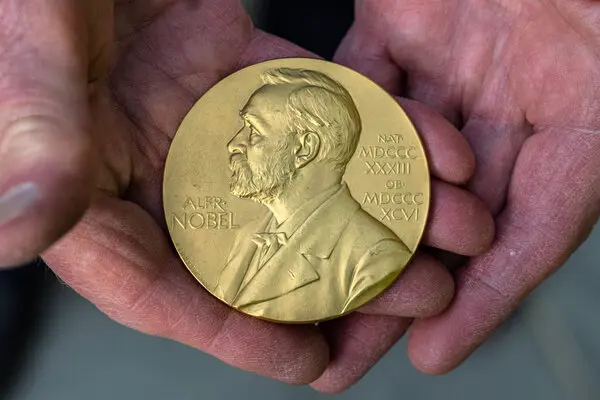

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.

In this project, I will analyze Nobel Prize winner data and identify patterns by answering the following questions:

1- What is the most commonly awarded gender and birth country?

2- Which decade had the highest ratio of US born Nobel Prize winners to total winners in all categories?

3- Which decade and Nobel Prize category combination had the highest proportion of female laureates?

4- Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [195]:
# Loading in needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [196]:
nobel = pd.read_csv('/content/drive/MyDrive/nobel.csv')

In [197]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [198]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [199]:
nobel.dtypes

,0
year,int64
category,object
prize,object
motivation,object
prize_share,object
laureate_id,int64
laureate_type,object
full_name,object
birth_date,object
birth_city,object


In [200]:
nobel = nobel.drop(['death_date','death_city','death_country','motivation', 'prize_share', 'laureate_id',
       'laureate_type'],axis=1)

In [201]:
nobel.columns

Index(['year', 'category', 'prize', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country'],
      dtype='object')

In [202]:
nobel.isna().sum()

,0
year,0
category,0
prize,0
full_name,0
birth_date,32
birth_city,36
birth_country,31
sex,30
organization_name,264
organization_city,265


 What is the most commonly awarded gender and birth country?

In [203]:
# Fiding the common gender
common_gender = nobel['sex'].value_counts().head(1)
print(common_gender)

sex
Male    905
Name: count, dtype: int64


In [204]:
# Find the top 10 most common countries
top_10_countries = nobel['birth_country'].value_counts().head(10)

print(top_10_countries)

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Switzerland                  19
Netherlands                  19
Italy                        18
Name: count, dtype: int64


In [205]:
# Storing the common gender and the top country
top_gender = 'Male'
top_country = 'United States of America'

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?


In [206]:
nobel['born_in_USA'] = nobel['birth_country'] == top_country
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
USA_ratio = nobel.groupby('decade', as_index = False)['born_in_USA'].mean()

# Printing ratios
print(USA_ratio)

    decade  born_in_USA
0     1900     0.017544
1     1910     0.075000
2     1920     0.074074
3     1930     0.250000
4     1940     0.302326
5     1950     0.291667
6     1960     0.265823
7     1970     0.317308
8     1980     0.319588
9     1990     0.403846
10    2000     0.422764
11    2010     0.314050
12    2020     0.360000


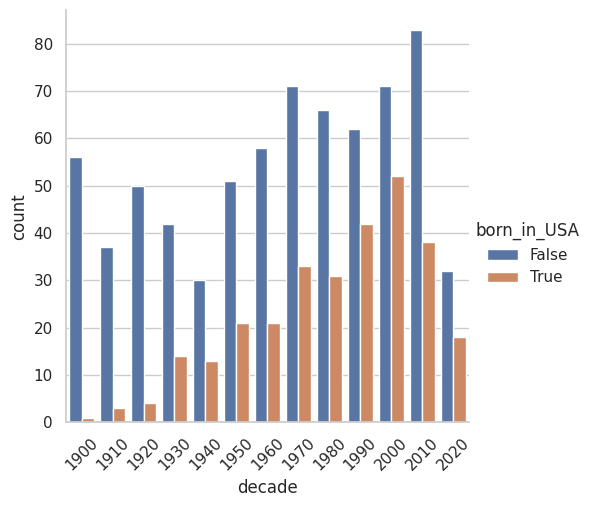

In [207]:
# visualizing the number of USA born winners in each decade
sns.set(style="whitegrid")

sns.catplot(x='decade',kind='count',data=nobel,hue='born_in_USA')
plt.xticks(rotation=45)

max_decade_usa=2000

In [208]:
# Identifying the decade with the highest proportion of US-born winners
max_decade_usa = USA_ratio[USA_ratio['born_in_USA'] == USA_ratio['born_in_USA'].max()]['decade'].values[0]
print("The decade with the highest proportion of US born winners is", max_decade_usa)

The decade with the highest proportion of US born winners is 2000


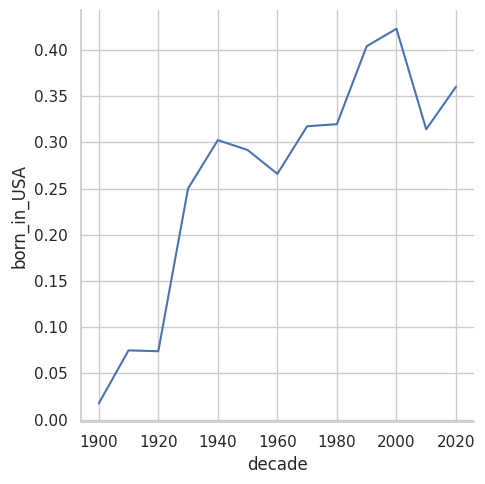

In [209]:
# Visualizing the ratios data
plot1 = sns.relplot(data = USA_ratio, kind = "line", x = 'decade', y = 'born_in_USA' )

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [210]:
# Filtering for female winners
nobel['female'] = nobel['sex'] == "Female"

In [211]:
# Finding the average of female winners by decade and category
female_category_decade = nobel.groupby(['decade','category'], as_index = False)['female'].mean()
print(female_category_decade.head(10))

   decade    category    female
0    1900   Chemistry  0.000000
1    1900  Literature  0.100000
2    1900    Medicine  0.000000
3    1900       Peace  0.071429
4    1900     Physics  0.076923
5    1910   Chemistry  0.125000
6    1910  Literature  0.000000
7    1910    Medicine  0.000000
8    1910       Peace  0.000000
9    1910     Physics  0.000000


In [212]:
# Finding the highest proportion of female laureates
max_female = female_category_decade[female_category_decade['female']==female_category_decade['female'].max()][['decade', 'category']]
print(max_female)

    decade    category
68    2020  Literature


In [213]:
# Storing it as a dictionary
max_female_dict = {max_female['decade'].values[0]:max_female['category'].values[0]}
print(max_female_dict)

{2020: 'Literature'}


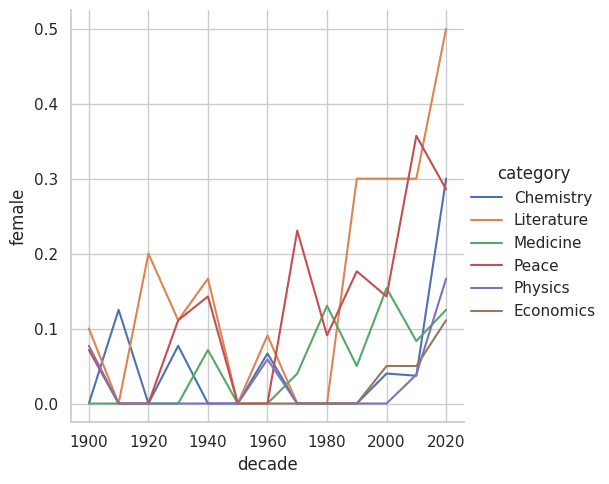

In [214]:
# Visualizing the data
plot2 = sns.relplot(data = female_category_decade, kind = "line", x = 'decade', y = 'female', hue = 'category' )

Who was the first woman to receive a Nobel Prize, and in what category

In [215]:
female_only = nobel[nobel['female']]
min_row = female_only[female_only['year'] == female_only['year'].min()]
first_woman_name = min_row['full_name'].values[0]
print (first_woman_name)

Marie Curie, née Sklodowska


In [216]:
first_woman_category = min_row['category'].values[0]
print(first_woman_category)

Physics


In [217]:
# Printing the answer
print("The first woman to win the nobel prize was", first_woman_name, ", in the category of", first_woman_category,".")

The first woman to win the nobel prize was Marie Curie, née Sklodowska , in the category of Physics .


Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [218]:
counts = nobel.value_counts('full_name')
repeats = counts[counts >= 2].index
repeat_list = list(repeats)
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen', 'Marie Curie, née Sklodowska']


In [219]:
# Printing the results summary
print("Most commonly awarded gender:", top_gender)
print("Most commonly awarded birth country:", top_country)
print("Decade with the highest ratio of US-born Nobel Prize winners:", max_decade_usa)
print("Decade and Nobel Prize category with the highest proportion of female laureates:", max_female_dict)
print("First woman to receive a Nobel Prize:", first_woman_name, "in category:", first_woman_category)
print("Individuals or organizations that have won more than one Nobel Prize:", repeat_list)

Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America
Decade with the highest ratio of US-born Nobel Prize winners: 2000
Decade and Nobel Prize category with the highest proportion of female laureates: {2020: 'Literature'}
First woman to receive a Nobel Prize: Marie Curie, née Sklodowska in category: Physics
Individuals or organizations that have won more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen', 'Marie Curie, née Sklodowska']
